# Playground series season 4, episode 1

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

1. **Customer ID:** A unique identifier for each customer
2. **Surname:** The customer's surname or last name
3. **Credit Score:** A numerical value representing the customer's credit score
4. **Geography:** The country where the customer resides (France, Spain, or Germany)
5. **Gender:** The customer's gender (Male or Female)
6. **Age:** The customer's age.
7. **Tenure:** The number of years the customer has been with the bank
8. **Balance:** The customer's account balance
9. **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
10. **HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)
11. **IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)
12. **EstimatedSalary:** The estimated salary of the customer
13. **Exited:** Whether the customer has churned (1 = yes, 0 = no)

Load initial libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

We load the initial dataset:

In [2]:
train = pd.read_csv('train.csv')
train.set_index('id',inplace = True)

In [3]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Training dataset imbalance

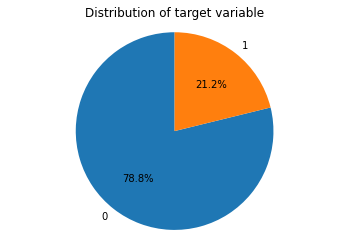

In [4]:
plt.pie(train.Exited.value_counts(),labels = train.Exited.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of target variable')
plt.axis('equal') 

plt.show()

#### NaN Counts

In [5]:
pd.DataFrame(train.isna().sum(), columns = ["NaN counts"])

,NaN counts
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


# Numerical variables analysis

In [6]:
numerical_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

train[numerical_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
NumOfProducts,165034.0,1.554455,0.547154,1.00,1.00,2.0,2.0000,4.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48


## Variable Histograms

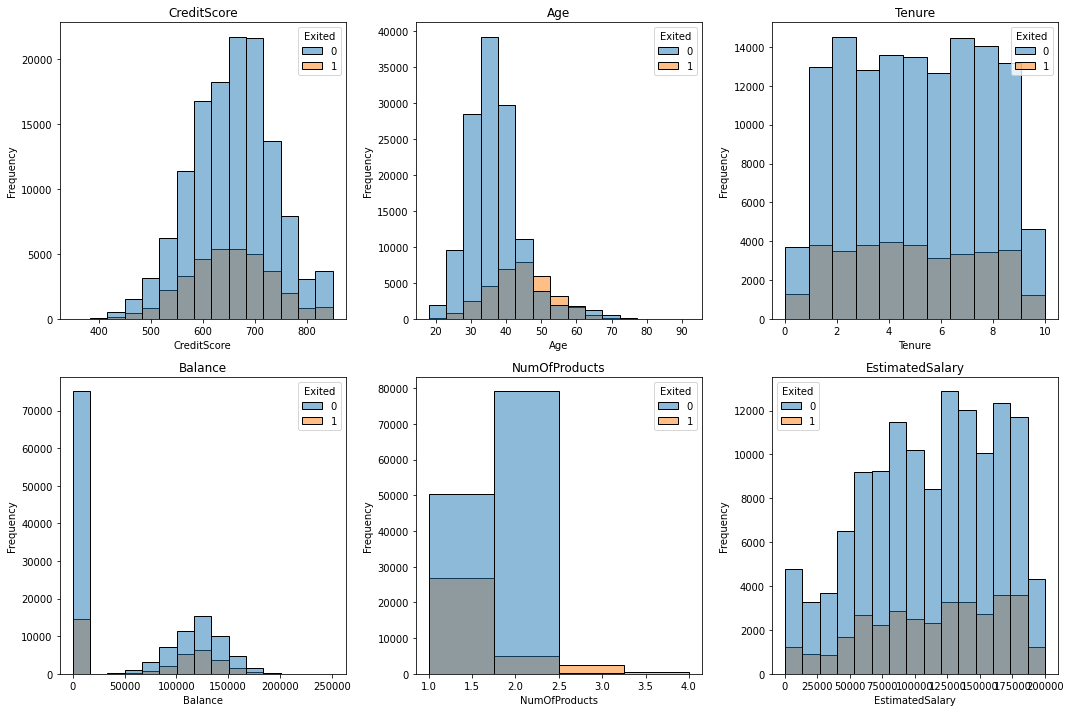

In [7]:
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create histograms
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    bins = min([len(train[variable].value_counts()),15])
    sns.histplot(data = train, x = variable, ax=ax, bins = bins, hue = "Exited", hue_order = [0,1])
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key takeaways

- All distributions seem reasonable. 
- Something to consider is that the mean age of both groups is different, so there are certains distribution differences in both groups which could label it as an important feature. 
- For Balance, there are many rows with 0 account balance, favoring the "0" class as the proportion is higher than in other bins.
- Higher NumOfProducts seem to be linked to the "1" class.

## Correlation Matrix

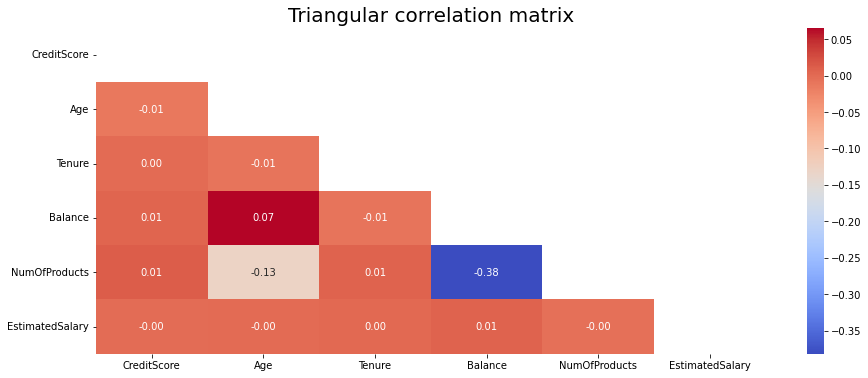

In [8]:
correlation_matrix = train[numerical_vars].corr(method = 'spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Triangular correlation matrix', size = 20)
plt.show()

## Key takeaways

- No outstanding correlations. Balance and NumOfProducts seem to be slightly inversely correlated.

## Pairplot

<Figure size 864x2880 with 0 Axes>

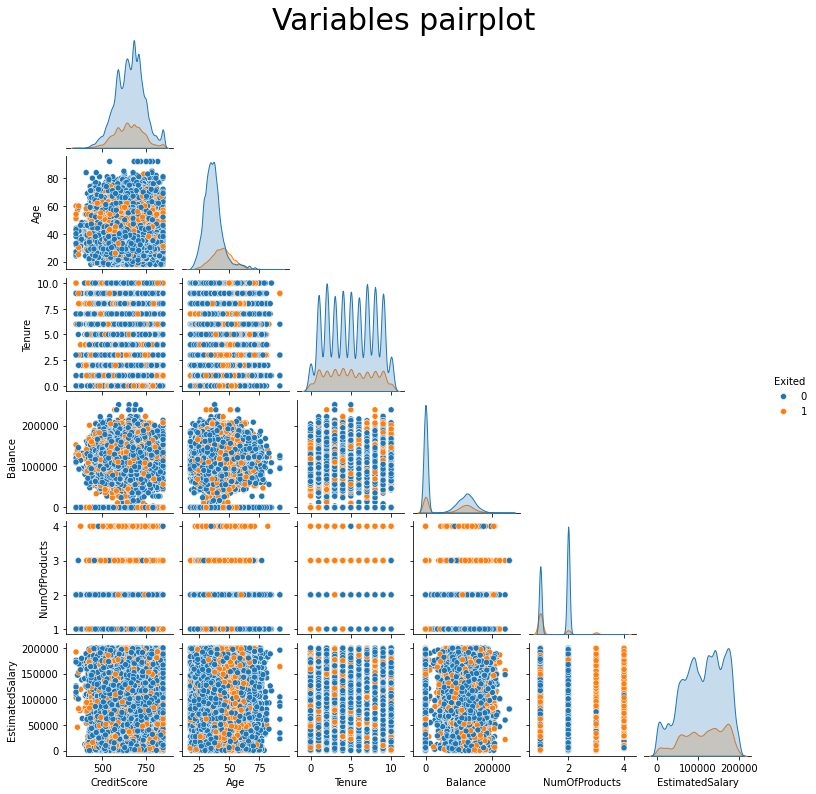

In [9]:
plt.figure(figsize=(12, 40))
pp = sns.pairplot(
    data = train[numerical_vars + ["Exited"]],
    hue='Exited',
    kind="scatter",
    diag_kind='kde',
    height=1.8,
    corner = True
);
pp.fig.suptitle("Variables pairplot", y=1.02, fontsize = 30)
plt.show()
plt.close()

### Key takeaways

- As discussed before, it seems that all variables crossed with age have datapoints corresponding to the "1" class in the mid-range, while for the "0" class they are more sparse.
- NumOfProducts show a higher density of the positive class in the higher values as well.

# Categorical variable analysis

In [10]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


We will not consider CustomerId and Surname for this model for the following reasons:

- CustomerId does not correspond to increasing or decreasing trends. It might bias the model as to thinking certain values may impact negatively on output, and since it's an identifier column it does not explain the target variable.
- Surname might be of use if we track down variables such as country of origin, ethnicity or other relationship to it. It will not be considered for this model but a potential improvement could be to track this as well.

## Bar plots

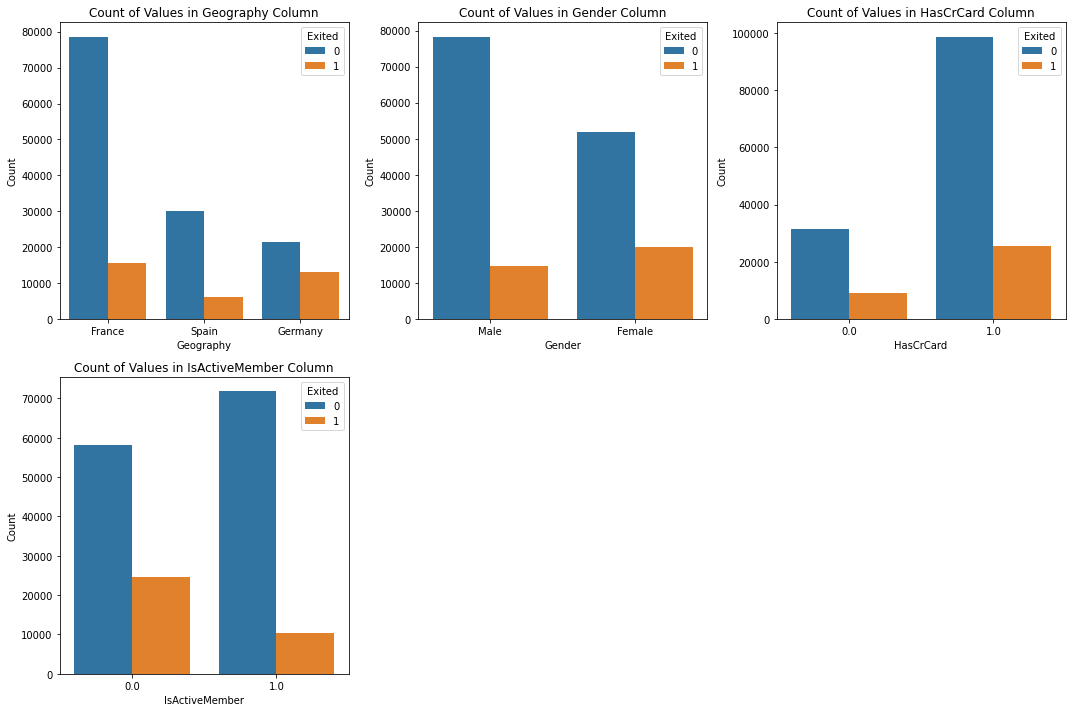

In [11]:
categorical_vars = ["Geography","Gender", "HasCrCard", "IsActiveMember"]

df_cat = train[categorical_vars]

ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(df_cat.columns) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through columns and create bar plots
for i, column in enumerate(df_cat.columns):
    ax = axes[i]
    bars = sns.countplot(x=column, data=train, hue = "Exited", ax=ax, hue_order = [0, 1])
    
    ax.set_title(f'Count of Values in {column} Column')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key takeaways

- Germany seems to be the more balanced of all countries across classes.
- Females show a lower difference between classes.
- HasCrCard does not seem to show much of a difference.
- IsActiveMember shows the 0 group to be more favorable for the "1" class.

# Train df build

Build binary features for categorical:

In [12]:
train_df = pd.get_dummies(train, columns = ["Gender","HasCrCard","IsActiveMember"],
                             prefix = ["Gender","HasCrCard","IsActiveMember"], drop_first = True)

train_df = pd.get_dummies(train_df, columns = ["Geography"],prefix = ["Geography"])

Scale the data:

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
scaler = RobustScaler()

train_df[numerical_vars] = scaler.fit_transform(train_df[numerical_vars])

Drop unwanted features:

In [15]:
train_df.drop(["CustomerId", "Surname"], axis = 1, inplace = True)

train_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0,Geography_France,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,,
0,0.079646,-0.4,-0.50,0.000000,0.0,0.788698,0,1,1,0,1,0,0
1,-0.283186,-0.4,-1.00,0.000000,0.0,-0.850085,0,1,1,1,1,0,0
2,0.168142,0.3,1.25,0.000000,0.0,0.831134,0,1,1,0,1,0,0
3,-0.690265,-0.3,-0.75,1.241313,-1.0,-0.414670,0,1,1,1,1,0,0
4,0.504425,-0.4,0.00,0.000000,0.0,-1.277766,0,1,1,1,0,0,1


# Colinearity

### Variance inflation factor analysis

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

cont_df = train_df

feats = cont_df.columns

vif_data = pd.DataFrame() 
vif_data["feature"] = feats
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(cont_df.values, i) 
                          for i in range(len(feats))] 

vif_data.set_index("feature", inplace = True)

vif_data["VIF"] = vif_data["VIF"].apply(lambda x: format(x, '.4f'))
vif_data.sort_values(["VIF"], inplace = True)

vif_data

,VIF
feature,
Tenure,1.0006
EstimatedSalary,1.0007
CreditScore,1.0011
HasCrCard_1.0,1.0019
Gender_Male,1.0224
IsActiveMember_1.0,1.0543
Age,1.1412
NumOfProducts,1.2183
Exited,1.2996


### Key Takeaways

- There is no multicolinearity across features. 
- We are seeing multicolinearity for the geographical labeling, so it might be useful to remove one when modelling. We will assess this with a feature selection algorithm.

# Modelling

In [17]:
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0,Geography_France,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,,
0,0.079646,-0.4,-0.50,0.000000,0.0,0.788698,0,1,1,0,1,0,0
1,-0.283186,-0.4,-1.00,0.000000,0.0,-0.850085,0,1,1,1,1,0,0
2,0.168142,0.3,1.25,0.000000,0.0,0.831134,0,1,1,0,1,0,0
3,-0.690265,-0.3,-0.75,1.241313,-1.0,-0.414670,0,1,1,1,1,0,0
4,0.504425,-0.4,0.00,0.000000,0.0,-1.277766,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.070796,-0.4,-0.75,0.000000,-1.0,0.172474,0,0,1,1,0,0,1
165030,1.176991,-0.2,-0.50,0.000000,-1.0,0.172471,0,1,0,0,1,0,0
165031,-0.831858,-0.6,0.00,0.000000,-1.0,0.117762,0,1,1,1,1,0,0


Import modelling tools.

In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RepeatedStratifiedKFold

import lightgbm as lgb

We will try the following classifiers initially and go forward with the one providing the best results.

In [19]:
model_dict = {
    'Hist': HistGradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'LGBM' : LGBMClassifier(verbose=-1),
    'Cat' : CatBoostClassifier(logging_level='Silent')
}

In [20]:
def k_fold_validation(skf,model_dict,X,y):
    
    model_list, auroc_list=[],[]
    
    for model_name, model in model_dict.items():
        
        auroc_temp=[]
        
        for train_index,test_index in skf.split(X, y):
            
            X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
            Y_train_fold, Y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
            model.fit(X_train_fold,Y_train_fold)
            y_pred = model.predict_proba(X_test_fold)[:,1]
    
            auroc_score = roc_auc_score(Y_test_fold, y_pred)
            auroc_temp.append(auroc_score)
            
        model_list.append(model_name)
        auroc_list.append(np.average(auroc_temp))
    return (pd.DataFrame({'Models': model_list, 'auroc_score': auroc_list}))

In [ ]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats =1, random_state=42)
k_fold_result = k_fold_validation(skf,model_dict,train_df.drop("Exited",axis = 1),train_df["Exited"])
k_fold_result.sort_values(by='auroc_score')

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Model average performance')
sns.barplot(k_fold_result.sort_values(by='auroc_score', ascending = False), x='auroc_score', 
            y='Models',orient='h',width=0.6)

plt.show()

We see all of these perform similarly. We will however go forward with the LGBM classifier as it obtained the highest result.

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

Split the datasets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("Exited",axis = 1), train_df["Exited"],
                                                    test_size=0.2, random_state=42)

Run an Optuna iteration to find the best hyperparameters for optimizing on AUC score.

In [ ]:
def objective_lgbm(trial):
    lgb_params = {
        'objective': 'binary',
        'metric': 'auc',  # log loss metric for binary classification
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 2, 128),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 200, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.01, 1.0),
        'verbose': -1
    }

    lgb_model = LGBMClassifier(**lgb_params, random_state=42)
    lgb_model.fit(X_train, y_train)

    # Show the ROC AUC score directly
    score = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])
    return score

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=50, show_progress_bar=True)

Adjust the model to training data.

In [ ]:
best_model = LGBMClassifier(**study_lgbm.best_params, verbose = -1)

best_model.fit(X_train,y_train)

Obtain the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("Train confusion matrix:")

cm = confusion_matrix(y_train, pd.Series(best_model.predict(X_train),index = y_train.index))

conf_matrix = ConfusionMatrixDisplay(cm,display_labels = [0,1])

conf_matrix.plot()

plt.show()

predictions = best_model.predict(X_test)

print(f"Train AUROC: {roc_auc_score(y_train,best_model.predict_proba(X_train)[:,1]):.4f}")
print("")

print("Test confusion matrix:")

cm = confusion_matrix(y_test, pd.Series(predictions,index = y_test.index))

conf_matrix = ConfusionMatrixDisplay(cm,display_labels = [0,1])

conf_matrix.plot()

plt.show()

print("")
print(f"Test AUROC: {roc_auc_score(y_test,best_model.predict_proba(X_test)[:,1]):.4f}")

Note there is no overfitting with the current hyperparameters.

## Model feature importances

In [ ]:
lgb.plot_importance(best_model, max_num_features=12, importance_type='split')
plt.title("Feature Importance (Split)")
plt.show()

lgb.plot_importance(best_model, max_num_features=12, importance_type='gain') 
plt.title("Feature Importance (Gain)")
plt.show()

### Key takeaways

- As discussed before, the main features showing up on the EDA reflect with the ones we are seeing here. We see that the geographical features don't seem to be adding much to the model at some point. Let's review the VIF values we obtained before:

In [ ]:
vif_data

Let's see how the model performs adding the top features sequentially:

In [ ]:
def forward_feature_selection(X, y, model):
    selected_features = []
    best_score = 0

    while True:
        remaining_features = list(set(X.columns) - set(selected_features))

        if not remaining_features:
            break  # No remaining features to add

        scores = []

        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            X_subset = X[candidate_features]

            X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

            model.fit(X_train, y_train)
            y_pred = model.predict_proba(X_test)[:,1]

            score = roc_auc_score(y_test, y_pred)

            scores.append((feature, score))

        # Select the feature with the best score
        best_feature, best_score = max(scores, key=lambda x: x[1])

        # Add the best feature to the selected features
        selected_features.append(best_feature)
        
        print(f"Added feature: {best_feature}, Score: {best_score}")

    return selected_features

In [ ]:
features_forward = forward_feature_selection(train_df.drop('Exited',axis = 1),train_df['Exited'],
                                             LGBMClassifier(**study_lgbm.best_params, verbose = -1))

We see that adding Geography_Spain as a feature does not improve the model and slightly impacts overall performance. We will therefore train the model and analyze the performance without this feature.

In [ ]:
X_train.drop("Geography_Spain", axis = 1, inplace = True)
X_test.drop("Geography_Spain", axis = 1, inplace = True)

In [ ]:
best_model = LGBMClassifier(**study_lgbm.best_params, verbose = -1)

best_model.fit(X_train,y_train)

In [ ]:
print("Train confusion matrix:")

cm = confusion_matrix(y_train, pd.Series(best_model.predict(X_train),index = y_train.index))

conf_matrix = ConfusionMatrixDisplay(cm,display_labels = [0,1])

conf_matrix.plot()

plt.show()

predictions = best_model.predict(X_test)

print(f"Train AUROC: {roc_auc_score(y_train,best_model.predict_proba(X_train)[:,1]):.4f}")
print("")

print("Test confusion matrix:")

cm = confusion_matrix(y_test, pd.Series(predictions,index = y_test.index))

conf_matrix = ConfusionMatrixDisplay(cm,display_labels = [0,1])

conf_matrix.plot()

plt.show()

print("")
print(f"Test AUROC: {roc_auc_score(y_test,best_model.predict_proba(X_test)[:,1]):.4f}")

There is not much of a change as compared to the previous result. We'll use this model for simplification purposes.

# Test

In [ ]:
test = pd.read_csv('test.csv')
test.set_index('id',inplace = True)

In [ ]:
test_df = pd.get_dummies(test, columns = ["Gender","HasCrCard","IsActiveMember"],
                             prefix = ["Gender","HasCrCard","IsActiveMember"], drop_first = True)

test_df = pd.get_dummies(test_df, columns = ["Geography"],prefix = ["Geography"])
test_df.drop("Geography_Spain", axis = 1, inplace = True)

test_df.drop(["CustomerId", "Surname"], axis = 1, inplace = True)

test_df[numerical_vars] = scaler.transform(test_df[numerical_vars])

In [ ]:
test_df

In [ ]:
test["Exited"] = best_model.predict_proba(test_df)[:,1]

In [ ]:
test["Exited"].to_csv("Submission.csv")